### Context
### ...

### On Importe les librairies nécessaire 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import ast

### On Importe les données 

In [2]:
DataPlat = pd.read_csv('Data/TFT_Platinum_MatchData.csv');
DataChall = pd.read_csv('Data/TFT_Challenger_MatchData.csv');

#### Afin de de garder l'indexation et avoir une lecture des données plus rapide nous allons garder seulement les 1000 premieres parties

In [3]:
DataPlat = DataPlat.head(1000)
DataChall = DataChall.head(1000)

DataPlat
# DataChall

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4291707834,1963.905273,6,27,5,1390.165771,"{'Cybernetic': 1, 'Demolitionist': 1, 'Infiltr...","{'Ziggs': {'items': [7], 'star': 1}, 'Ashe': {..."
1,KR_4291707834,1963.905273,8,37,3,1891.282715,"{'Blaster': 1, 'Chrono': 1, 'Cybernetic': 4, '...","{'Ziggs': {'items': [24], 'star': 3}, 'Fiora':..."
2,KR_4291707834,1963.905273,6,25,7,1279.461060,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 2,...","{'Fiora': {'items': [1], 'star': 1}, 'Shaco': ..."
3,KR_4291707834,1963.905273,7,38,2,1955.608521,"{'DarkStar': 1, 'Protector': 2, 'Set3_Blademas...","{'Poppy': {'items': [], 'star': 2}, 'Xayah': {..."
4,KR_4291707834,1963.905273,8,38,1,1955.608521,"{'Blaster': 1, 'Chrono': 5, 'DarkStar': 3, 'Pr...","{'TwistedFate': {'items': [36, 27], 'star': 3}..."
...,...,...,...,...,...,...,...,...
995,KR_4389301206,1988.682129,8,30,8,1626.902222,"{'Blaster': 1, 'Chrono': 1, 'DarkStar': 1, 'De...","{'TwistedFate': {'items': [], 'star': 1}, 'Gra..."
996,KR_4389301206,1988.682129,8,31,7,1683.837524,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [44, 44, 39], 'star': 2}, ..."
997,KR_4389301206,1988.682129,8,35,3,1908.315430,"{'Blaster': 1, 'Chrono': 2, 'Demolitionist': 2...","{'Graves': {'items': [], 'star': 3}, 'Xayah': ..."
998,KR_4389301206,1988.682129,9,37,1,1980.388916,"{'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, ...","{'Caitlyn': {'items': [], 'star': 2}, 'JarvanI..."


####  Nous allons récupere seulement la composition principale de chaque joueur afin d'avoir une avanlyse pertinante (colonne "combination").
#### Pour cela on récupere seulement la composition qui contien de plus de personnages, si il y en a plusieurs a la meme valeur alors on les associes

In [4]:
DataPlat.insert(8, "composition", "Any")
DataChall.insert(8, "composition", "Any")

DataPlat

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,composition
0,KR_4291707834,1963.905273,6,27,5,1390.165771,"{'Cybernetic': 1, 'Demolitionist': 1, 'Infiltr...","{'Ziggs': {'items': [7], 'star': 1}, 'Ashe': {...",Any
1,KR_4291707834,1963.905273,8,37,3,1891.282715,"{'Blaster': 1, 'Chrono': 1, 'Cybernetic': 4, '...","{'Ziggs': {'items': [24], 'star': 3}, 'Fiora':...",Any
2,KR_4291707834,1963.905273,6,25,7,1279.461060,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 2,...","{'Fiora': {'items': [1], 'star': 1}, 'Shaco': ...",Any
3,KR_4291707834,1963.905273,7,38,2,1955.608521,"{'DarkStar': 1, 'Protector': 2, 'Set3_Blademas...","{'Poppy': {'items': [], 'star': 2}, 'Xayah': {...",Any
4,KR_4291707834,1963.905273,8,38,1,1955.608521,"{'Blaster': 1, 'Chrono': 5, 'DarkStar': 3, 'Pr...","{'TwistedFate': {'items': [36, 27], 'star': 3}...",Any
...,...,...,...,...,...,...,...,...,...
995,KR_4389301206,1988.682129,8,30,8,1626.902222,"{'Blaster': 1, 'Chrono': 1, 'DarkStar': 1, 'De...","{'TwistedFate': {'items': [], 'star': 1}, 'Gra...",Any
996,KR_4389301206,1988.682129,8,31,7,1683.837524,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [44, 44, 39], 'star': 2}, ...",Any
997,KR_4389301206,1988.682129,8,35,3,1908.315430,"{'Blaster': 1, 'Chrono': 2, 'Demolitionist': 2...","{'Graves': {'items': [], 'star': 3}, 'Xayah': ...",Any
998,KR_4389301206,1988.682129,9,37,1,1980.388916,"{'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, ...","{'Caitlyn': {'items': [], 'star': 2}, 'JarvanI...",Any


In [5]:
for i in range(len(DataPlat)) : 
    
    if len(ast.literal_eval(DataPlat.combination[i])) > 0 :

        max_value = max(ast.literal_eval(DataPlat.combination[i]).values())
        max_keys = [k for k, v in ast.literal_eval(DataPlat.combination[i]).items() if v == max_value]

        if len(max_keys) == 1 :
            result = max_keys[0]
        elif len(max_keys) > 1 :
            result = ""
            for i in range(len(max_keys) - 1) :
                result = result + max_keys[i] +"/"
        else :
            result = "Any"
            
#         print(result)
        DataPlat.composition[i] = result

<ipython-input-5-017131ad9fe0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataPlat.composition[i] = result


In [6]:
for i in range(len(DataChall)) : 
    
    if len(ast.literal_eval(DataChall.combination[i])) > 0 :

        max_value = max(ast.literal_eval(DataChall.combination[i]).values())
        max_keys = [k for k, v in ast.literal_eval(DataChall.combination[i]).items() if v == max_value]

        if len(max_keys) == 1 :
            result = max_keys[0]
        elif len(max_keys) > 1 :
            result = ""
            for i in range(len(max_keys) - 1) :
                result = result + max_keys[i] +"/"
        else :
            result = "Any"
            
#         print(result)
        DataChall.composition[i] = result

<ipython-input-6-66f5b3b139a3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataChall.composition[i] = result


#### On récupere donc une nouvelle colonne "composition" avec la combinaision principale du joueur

In [7]:
# DataChall
DataPlat

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,composition
0,KR_4291707834,1963.905273,6,27,5,1390.165771,"{'Cybernetic': 1, 'Demolitionist': 1, 'Infiltr...","{'Ziggs': {'items': [7], 'star': 1}, 'Ashe': {...",Set3_Sorcerer/
1,KR_4291707834,1963.905273,8,37,3,1891.282715,"{'Blaster': 1, 'Chrono': 1, 'Cybernetic': 4, '...","{'Ziggs': {'items': [24], 'star': 3}, 'Fiora':...",Chrono/ManaReaver/
2,KR_4291707834,1963.905273,6,25,7,1279.461060,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 2,...","{'Fiora': {'items': [1], 'star': 1}, 'Shaco': ...",Chrono/Set3_Blademaster/Valkyrie/
3,KR_4291707834,1963.905273,7,38,2,1955.608521,"{'DarkStar': 1, 'Protector': 2, 'Set3_Blademas...","{'Poppy': {'items': [], 'star': 2}, 'Xayah': {...",Demolitionist/Set3_Celestial/Sniper/SpacePirate/
4,KR_4291707834,1963.905273,8,38,1,1955.608521,"{'Blaster': 1, 'Chrono': 5, 'DarkStar': 3, 'Pr...","{'TwistedFate': {'items': [36, 27], 'star': 3}...",Rebel/Set3_Blademaster/Set3_Celestial/Sniper/S...
...,...,...,...,...,...,...,...,...,...
995,KR_4389301206,1988.682129,8,30,8,1626.902222,"{'Blaster': 1, 'Chrono': 1, 'DarkStar': 1, 'De...","{'TwistedFate': {'items': [], 'star': 1}, 'Gra...",Any
996,KR_4389301206,1988.682129,8,31,7,1683.837524,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [44, 44, 39], 'star': 2}, ...",Rebel
997,KR_4389301206,1988.682129,8,35,3,1908.315430,"{'Blaster': 1, 'Chrono': 2, 'Demolitionist': 2...","{'Graves': {'items': [], 'star': 3}, 'Xayah': ...",SpacePirate
998,KR_4389301206,1988.682129,9,37,1,1980.388916,"{'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, ...","{'Caitlyn': {'items': [], 'star': 2}, 'JarvanI...",Set3_Celestial


#### On peut donc désormer enlever la conolne "combination" que l'on a refait selon notre besoin et suprimier la colonne champion qui n'est pas utile a l'analyse

In [8]:
DataPlat = DataPlat.drop(columns=["combination", "champion"], axis='columns')
DataChall = DataChall.drop(columns=["combination", "champion"], axis='columns')

DataPlat

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,composition
0,KR_4291707834,1963.905273,6,27,5,1390.165771,Set3_Sorcerer/
1,KR_4291707834,1963.905273,8,37,3,1891.282715,Chrono/ManaReaver/
2,KR_4291707834,1963.905273,6,25,7,1279.461060,Chrono/Set3_Blademaster/Valkyrie/
3,KR_4291707834,1963.905273,7,38,2,1955.608521,Demolitionist/Set3_Celestial/Sniper/SpacePirate/
4,KR_4291707834,1963.905273,8,38,1,1955.608521,Rebel/Set3_Blademaster/Set3_Celestial/Sniper/S...
...,...,...,...,...,...,...,...
995,KR_4389301206,1988.682129,8,30,8,1626.902222,Any
996,KR_4389301206,1988.682129,8,31,7,1683.837524,Rebel
997,KR_4389301206,1988.682129,8,35,3,1908.315430,SpacePirate
998,KR_4389301206,1988.682129,9,37,1,1980.388916,Set3_Celestial


#### Maintent que nos données sont pretes, On va chercher a comprendre la différence entre les joueurs Platine et Challenger 

#### Dans un premier temps comparon le niveau atteint des joueurs en fin de partie

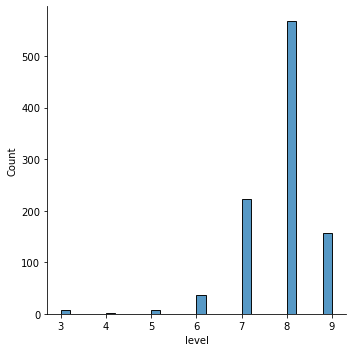

In [11]:
sns.displot(x="level",data=DataPlat)

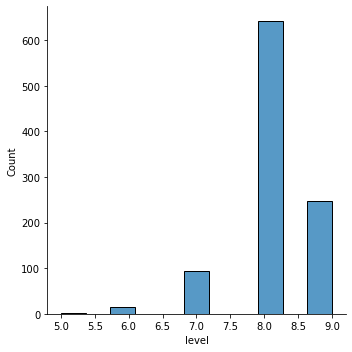

In [12]:
sns.displot(x="level",data=DataChall)

#### Comme on peut le constaté les joueurs challenger on plus tendence a atteindre le niveau 9 que les platine qui eux on plus de joueurs niveau 6 et 7.
#### Cependant on remarque que des deux cotés une majorité termine la partie au niveau 8

#### Nous allons donc voir si le niveaux atteint en fin de partie influ sur la victoire chez les challenger, sachant que un "Rank" 1,2,3 ou 4 est une victoire et que 5,6,7 et 8 sont une défaite

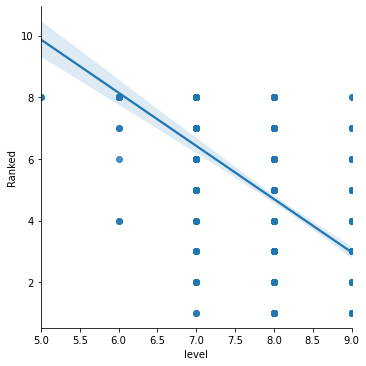

In [15]:
sns.lmplot(x="level", y="Ranked", data=DataChall)

#### On remaque donc que plus le joueur tend vers le niveau 9 plus il tend vers un Rank 1

#### On peut donc en conclure que atteindre le niveau 9 augmente nos chances de gagner

In [16]:
DataCorrPlat = DataPlat.corr()
DataCorrChall = DataChall.corr()

DataCorrPlat

,gameDuration,level,lastRound,Ranked,ingameDuration
gameDuration,1.000000,0.460512,0.506815,0.107569,0.608835
level,0.460512,1.000000,0.655023,-0.324899,0.666495
lastRound,0.506815,0.655023,1.000000,-0.667557,0.951917
Ranked,0.107569,-0.324899,-0.667557,1.000000,-0.613637
ingameDuration,0.608835,0.666495,0.951917,-0.613637,1.000000


<AxesSubplot:>

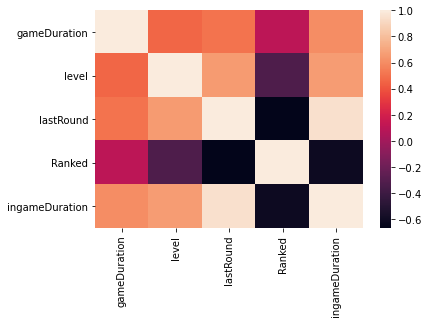

In [17]:
sns.heatmap(DataCorrPlat)

<AxesSubplot:>

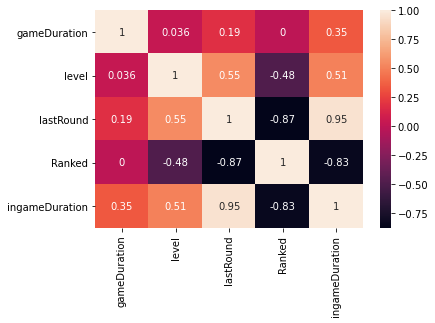

In [19]:
sns.heatmap(DataCorrChall, annot=True)